## Data Science Assignment - HR Data Analysis

Task 1: Exploratory Data Analysis (EDA)

1. Data Quality Check:
• Identify any missing values and handle them appropriately. Also provide justification for using a particular technique to handle missing values in the word document itself
• Analyze the data for any anomalies or outliers.
2. Statistical Summary:
• Provide a summary of key statistics for numerical columns.
• Summarize the categorical variables.
3. Data Visualization:
• Plot the distribution of key variables such as Age, Satisfaction_Score, Performance_Score, and Salary.
• Visualize the attrition rate across different departments, genders, and age groups.
• Comment on any trends you observe in the visualizations.

Task 2: Statistical Analysis

1. Hypothesis Testing:
• Test whether there is a significant difference in satisfaction scores between employees who have been promoted in the last 3 years and those who have not. Use an appropriate statistical test and explain your findings.
• Test if the average performance score differs significantly across different departments.
2. Correlation Analysis:
• Calculate and analyze the correlation between Satisfaction_Score, Performance_Score, Tenure, and Salary.
• Interpret the results and comment on any notable correlations.


Task 3: Modeling

1.
• Build an appropriate model to predict employee attrition (Attrition) using variables you believe are relevant.
• Evaluate the model’s performance using appropriate metrics.
• Interpret the coefficients and explain which variables significantly influence attrition.


In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

In [60]:
## First we will read the data 
import pandas as pd
HR = pd.read_csv("HR-Employee-Attrition Dataset.csv")

In [62]:
HR.head(2)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceScore,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,80,8,0,1,6,4,0,5
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,80,10,3,3,10,7,1,7


### Task 1: Exploratory Data Analysis (EDA)

#### 1. Data Quality Check:

##### 1.1 Missing Values

In [10]:
HR.isnull().sum()  # Missing Values: Check for missing values across columns using
# Data looks good there isn't any null values 

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceScore            0
RelationshipSatisfaction    0
StandardHours               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
HR.describe() # thins code help for stastical analysis 
# look for measures of tendency 
# some of my view on this 
# Average age of the emp. working are about 30's Oldest are about 60's.
# another insight from this is Performance Score Mean is 3.15 
# lets do more work on this !

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceScore,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,...,3.153741,2.712245,80.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### 1.2 Outliers

In [13]:
import seaborn as sns # for data visulization another option is there matplotlib

In [14]:
HR.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceScore', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

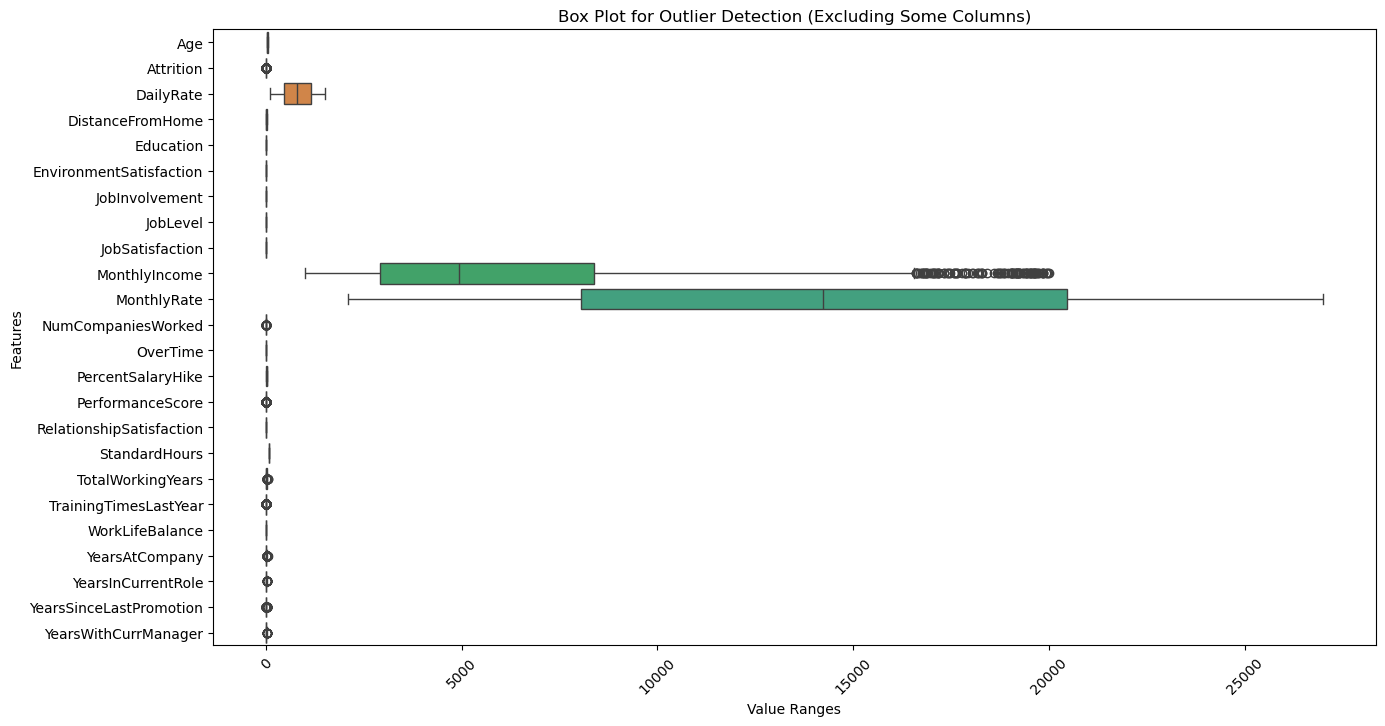

In [15]:
# Define columns to exclude
exclude_columns = ["EmployeeID", "is_outlier?"] 

# Select only numerical columns excluding unwanted ones
numeric_cols = HR.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')

# Plot box plots for all remaining numerical columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient="h")
plt.title("Box Plot for Outlier Detection (Excluding Some Columns)")
plt.xlabel("Value Ranges")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.show()


''' Monthly Income column Having Outliers '''

<Axes: xlabel='Age'>

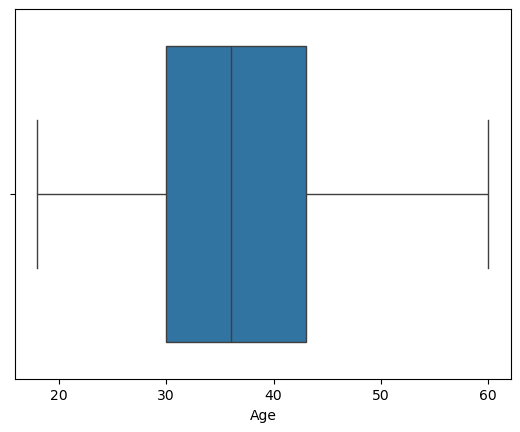

In [17]:
sns.boxplot(x='Age', data=HR) # lets try to visulize this data look for outliers.
# it looks good there isn't any extreme points.
# there are no individual points outside the whiskers.
# z-score test is also there if we want t ofind any hidden outliers or extreme values.
# i think most of the emp. age is between 30 and 45 years. i think 36 age will be the median here !
# lets move to the next !!!!

<Axes: xlabel='DistanceFromHome'>

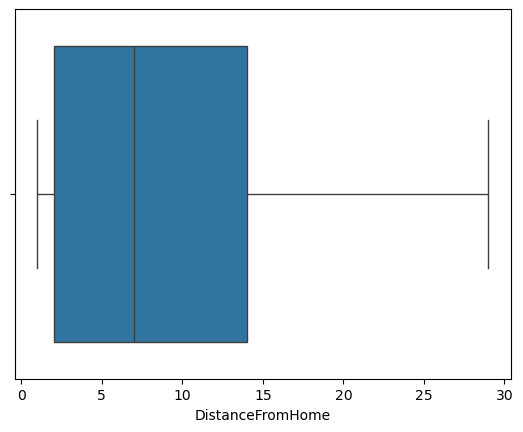

In [18]:
# DistanceFromHome lets see how this turns out !
sns.boxplot(x='DistanceFromHome', data=HR)
# in above describe function also shown us that 7 is mean 
# range i think 3 to 14 KM . this states most of the emp. stays in this range of area 

<Axes: xlabel='MonthlyIncome'>

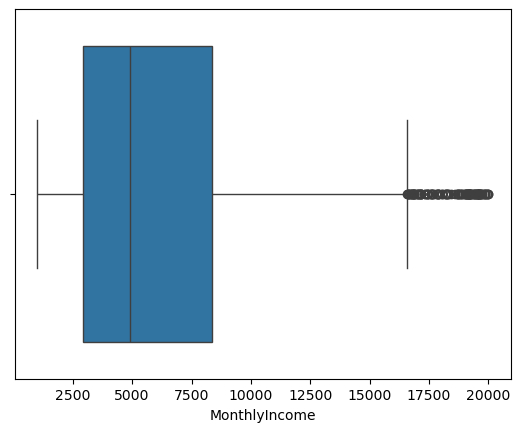

In [19]:
sns.boxplot(x="MonthlyIncome", data=HR)
# we can see there outliers are there in monthly salary column 
# yes there are the outliers or more earning peoples but there should be a reason for this why they are being paid more? any significant achivement?
# thats why we cant just treat them we need to find those people and look for their uniqueness why they are being paid more than others?, 'maybe they are the backbone of company's growth!'

In [20]:
# Calculate Q1, Q3, and IQR 
# lets look for those peoples or achivers!
Q1 = HR['MonthlyIncome'].quantile(0.25) # for low paying guys
Q3 = HR['MonthlyIncome'].quantile(0.75) # higher or uppper bound peoples
IQR = Q3 - Q1 

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
HR['is_outlier?'] = (HR['MonthlyIncome'] < lower_bound) | (HR['MonthlyIncome'] > upper_bound)


In [21]:
HR.head(3)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_outlier?
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,8,0,1,6,4,0,5,False
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,10,3,3,10,7,1,7,False
2,4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,7,3,3,0,0,0,0,False


In [22]:
# Filter the records where the salary is flagged as an outlier
outliers = HR[HR['is_outlier?'] == True]

# Categorize the outliers into upper and lower outliers
lower_outliers = outliers[outliers['MonthlyIncome'] < lower_bound]
upper_outliers = outliers[outliers['MonthlyIncome'] > upper_bound]

In [23]:
# i think these parameters will be impactful for analysis ! so i chose these many only !
important_columns = ['Age', 'Education', 'JobLevel', 'JobSatisfaction', 'WorkLifeBalance', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'JobInvolvement', 'PerformanceScore']

# Summary of these columns for the entire population
print("Average MonthlyIncome Summary!!!:")
print(HR[important_columns].describe())

# Summary for the upper salary outliers
print("\nUpper Salary Outliers Summary!!!:")
print(upper_outliers[important_columns].describe())


Average MonthlyIncome Summary!!!:
               Age    Education     JobLevel  JobSatisfaction  \
count  1470.000000  1470.000000  1470.000000      1470.000000   
mean     36.923810     2.912925     2.063946         2.728571   
std       9.135373     1.024165     1.106940         1.102846   
min      18.000000     1.000000     1.000000         1.000000   
25%      30.000000     2.000000     1.000000         2.000000   
50%      36.000000     3.000000     2.000000         3.000000   
75%      43.000000     4.000000     3.000000         4.000000   
max      60.000000     5.000000     5.000000         4.000000   

       WorkLifeBalance  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000        1470.000000     1470.000000         1470.000000   
mean          2.761224          11.279592        7.008163            4.229252   
std           0.706476           7.780782        6.126525            3.623137   
min           1.000000           0.000000        0.00000

'''Key Takeaways for Analysis:

*Experience and job level are the most significant factors differentiating upper salary earners from the general population. More experience and seniority tend to be linked to higher salaries.
While education does play a small role, job satisfaction and work-life balance seem less important in determining higher salaries.
Job involvement and performance scores are fairly similar across both groups, suggesting they may not be as influential in determining salary in this dataset. '''

#### 2. Statistical Summary

In [26]:
# for this part i am going with to spepearte data by their data type numerical and categorical here !
HR.dtypes

EmployeeID                   int64
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceScore             int64
RelationshipSatisfaction     int64
StandardHours                int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [27]:
# numerical col.first 
num_col = HR.select_dtypes(include=['int64']).columns

In [28]:
# lets see we got right or not 
num_col

Index(['EmployeeID', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceScore',
       'RelationshipSatisfaction', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
# categorical col.
cat_col = HR.select_dtypes(include=['object']).columns

In [30]:
cat_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [31]:
# lets hard code them 
numerical_cols = [
    "EmployeeID", "Age", "Attrition", "DailyRate", "DistanceFromHome",
    "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
    "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "OverTime", "PercentSalaryHike", "PerformanceScore", "RelationshipSatisfaction",
    "StandardHours", "TotalWorkingYears", "TrainingTimesLastYear",
    "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

In [32]:
print(HR[numerical_cols].describe()) # now its continuous data lets do some analysis on this 
# from this total count of emp. is 1470 
# age is between 18 to 60 *numbers are in decimal ignore the zeros 
# Mean Attrition Rate = 0.161 (or 16.1%) this shows the the company's reputation *lower rate indicates company's reputation
# 2.72 with this rate i thnk emp. are moderately satisfied with Environment of company 
# JobSatisfaction - not so different from 'EnvironmentSatisfaction' data around it 

        EmployeeID          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1470.000000  1470.000000       1470.000000   
mean   1024.865306    36.923810     0.161224   802.485714          9.192517   
std     602.024335     9.135373     0.367863   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     491.250000    30.000000     0.000000   465.000000          2.000000   
50%    1020.500000    36.000000     0.000000   802.000000          7.000000   
75%    1555.750000    43.000000     0.000000  1157.000000         14.000000   
max    2068.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EnvironmentSatisfaction  JobInvolvement     JobLevel  \
count  1470.000000              1470.000000     1470.000000  1470.000000   
mean      2.912925                 2.721769        2.729932     2.063946   
std       1.024165                 1.093082        0.711561 

In [33]:
print(HR['MonthlyIncome'].describe())
# 6502.93 dollers is their average salary 
'''
The standard deviation of MonthlyIncome is 4707.96, 
indicating that individual salaries deviate from the average salary (6502.93) by about 4707.96 on average, 
meaning most salaries fall between 1794.97 and 11210.89 dollers, but the presence of 
outliers (with salaries as low as 1009 and as high as 19999) increases the overall spread.
'''


count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


'\nThe standard deviation of MonthlyIncome is 4707.96, \nindicating that individual salaries deviate from the average salary (6502.93) by about 4707.96 on average, \nmeaning most salaries fall between 1794.97 and 11210.89 dollers, but the presence of \noutliers (with salaries as low as 1009 and as high as 19999) increases the overall spread.\n'

In [34]:
categorical_cols = [
    "BusinessTravel", "Department", "EducationField", "Gender",
    "JobRole", "MaritalStatus"
]

HR[categorical_cols].describe()  # Gives count, unique values, top value, frequency
HR[categorical_cols].apply(lambda x: x.value_counts())  # Detailed count of each category


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
Divorced,NaN,NaN,NaN,NaN,NaN,327.0
Female,NaN,NaN,NaN,588.0,NaN,NaN
Healthcare Representative,NaN,NaN,NaN,NaN,131.0,NaN
Human Resources,NaN,63.0,27.0,NaN,52.0,NaN
Laboratory Technician,NaN,NaN,NaN,NaN,259.0,NaN
Life Sciences,NaN,NaN,606.0,NaN,NaN,NaN
Male,NaN,NaN,NaN,882.0,NaN,NaN
Manager,NaN,NaN,NaN,NaN,102.0,NaN
Manufacturing Director,NaN,NaN,NaN,NaN,145.0,NaN
Marketing,NaN,NaN,159.0,NaN,NaN,NaN


In [35]:
HR['BusinessTravel'].value_counts() #most of them travels rarely

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [36]:
HR['Gender'].value_counts() #this code shows the count by gender 

Gender
Male      882
Female    588
Name: count, dtype: int64

In [37]:
# Group by JobRole and describe the salary data (MonthlyIncome)
job_role_salary_desc = HR.groupby('JobRole')['MonthlyIncome'].describe()

# Display the results
print(job_role_salary_desc)


                           count          mean          std      min  \
JobRole                                                                
Healthcare Representative  131.0   7528.763359  2542.550170   4000.0   
Human Resources             52.0   4235.750000  2438.849744   1555.0   
Laboratory Technician      259.0   3237.169884  1150.249802   1102.0   
Manager                    102.0  17181.676471  2317.199822  11244.0   
Manufacturing Director     145.0   7295.137931  2676.745753   4011.0   
Research Director           80.0  16033.550000  2827.621369  11031.0   
Research Scientist         292.0   3239.972603  1198.116113   1009.0   
Sales Executive            326.0   6924.279141  2366.943019   4001.0   
Sales Representative        83.0   2626.000000   854.534419   1052.0   

                                25%      50%       75%      max  
JobRole                                                          
Healthcare Representative   5562.00   6811.0   9769.50  13966.0  
Human Res

'''Key Insights:
High-paying Roles:

*Manager has the highest average salary, with a mean of 17,181.68, and a maximum salary of 19,999. This suggests that managerial roles are among the top earners in this dataset.
*Research Director also stands out with a mean of 16,033.55, and the salary range goes up to 19,973, which shows this role is relatively high-paying too.
Lower-paying Roles:

*Human Resources and Sales Representative are among the lower-paying job roles, with average salaries of 4,235.75 and 2,626.00, respectively. The minimum salary in Human Resources is as low as 1,555, indicating some variation, but overall, it's relatively lower compared to other roles.
Salary Range and Variability:

The standard deviation (std) values show the salary variability within each role. For example, the Human Resources role has a high standard deviation of 2,438.85, suggesting significant differences in pay within this role.
The Manager and Research Director roles also show high standard deviations, indicating a wide range of salaries within these job roles.
Salary Distribution:

The 25th, 50th (median), and 75th percentiles give us a good sense of the salary spread:

*For Managers, 25% earn around 16,339.50, 50% earn around 17,454.5, and 75% earn around 19,129.25. This shows a strong salary progression for this role.
In contrast, the Sales Representative role has much lower salary values, with the 75th percentile at 2,878.50, indicating that even higher-earning individuals in this role don't reach as high a salary as those in managerial or director roles.
Salary Ceiling (Max Salary):

Roles like Manager, Research Director, and Healthcare Representative have their maximum salaries at 19,999, the highest salary cap. Other roles like Sales Representative have much lower caps, with a maximum of 6,632.
Career Path Insights:

It appears that Research Directors and Managers are among the highest-paid roles, likely due to the level of responsibility and expertise required.
Roles like Healthcare Representative, Sales Executive, and Laboratory Technician tend to be more mid-tier or lower-paying, likely reflecting less managerial responsibility or specialization. '''

#### 3. Data Visualization

In [87]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

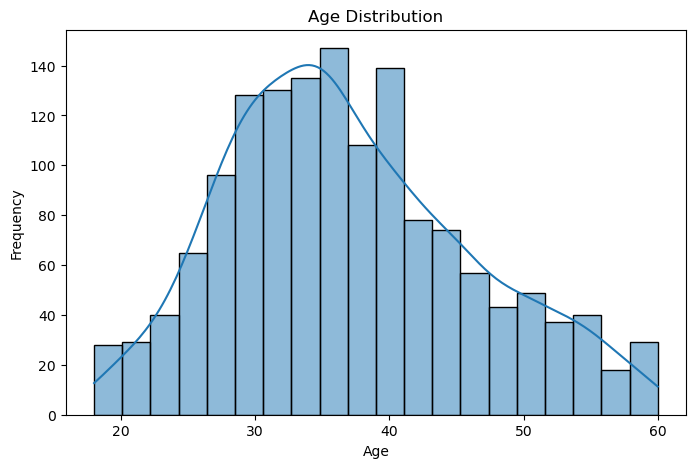

In [40]:
# Histogram for Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(HR['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show() 


''' The distribution seems somewhat symmetric around the peak, with frequencies decreasing as ages move away from the central range. This shows a normal distribution!'''

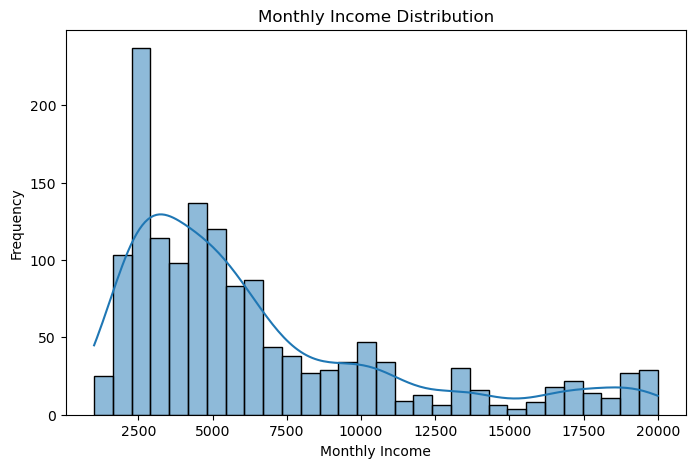

In [42]:
# Histogram for Monthly Income distribution
plt.figure(figsize=(8, 5))
sns.histplot(HR['MonthlyIncome'], kde=True, bins=30)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

''' yes we can't see normal distribtuion here in salary or incomes analysis '''

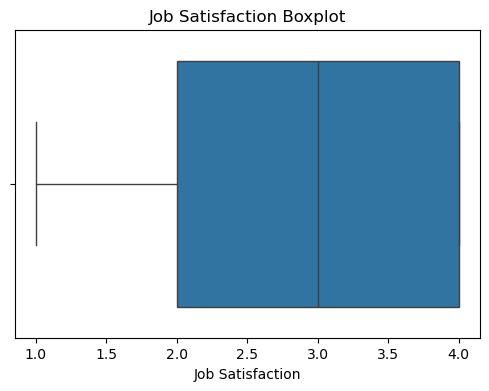

In [44]:
# Boxplot for Job Satisfaction
plt.figure(figsize=(6, 4))
sns.boxplot(x='JobSatisfaction', data=HR)
plt.title('Job Satisfaction Boxplot')
plt.xlabel('Job Satisfaction')
plt.show()

''' range lies from 2 to 4 and we cant see any potential outliers here '''

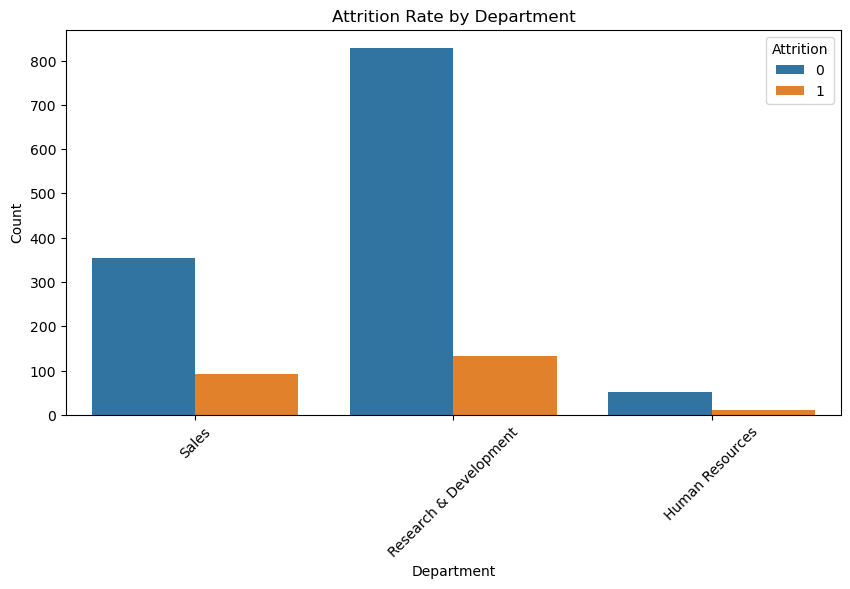

In [46]:
# Attrition by Department
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', hue='Attrition', data=HR)
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

'''Attrition = 0 → Employee is still working (No Attrition)
   Attrition = 1 → Employee has left the company (Attrition)
   
   *"The attrition analysis by department indicates that while Sales and Research & Development (R&D) show significant employee departures, this is influenced by the fact that the majority of employees belong to the R&D department. The Human Resources (HR) department shows relatively low attrition, with only a minor difference between employees who stayed and those who left. This suggests that attrition trends should be analyzed in proportion to the total number of employees in each department rather than absolute counts."

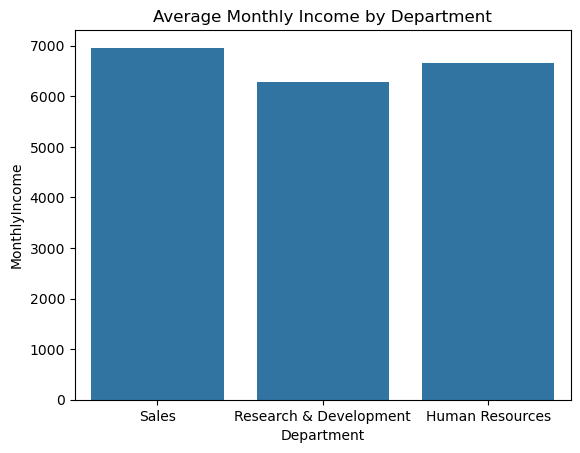

In [93]:
sns.barplot(x='Department', y='MonthlyIncome', data=HR, estimator=np.mean, errorbar=None)
plt.title("Average Monthly Income by Department")
plt.show()


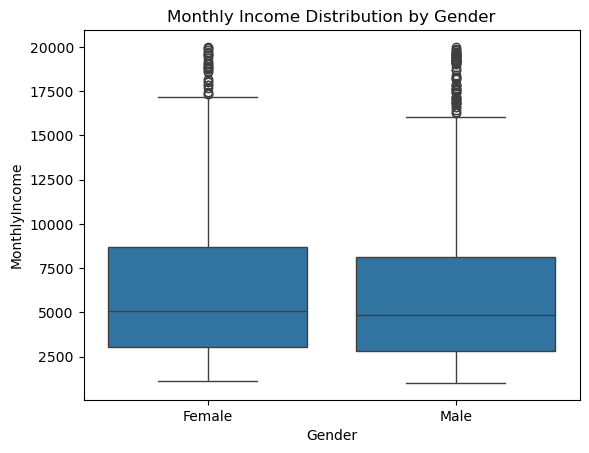

In [81]:
sns.boxplot(x='Gender', y='MonthlyIncome', data=HR)
plt.title("Monthly Income Distribution by Gender")  # Ensure plt is correctly referenced
plt.show()


In [ ]:
# Calculate count of employees still working per department
current_emp_counts = HR[HR['Attrition'] == 0]['Department'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(current_emp_counts, labels=current_emp_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Current Employees Distribution by Department')
plt.show()


'' The company is heavily focused on Research & Development.

Sales is the second major department, and managing retention here is crucial.

HR is a small but necessary support function. '''

In [95]:
HR.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceScore', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'is_outlier?'],
      dtype='object')

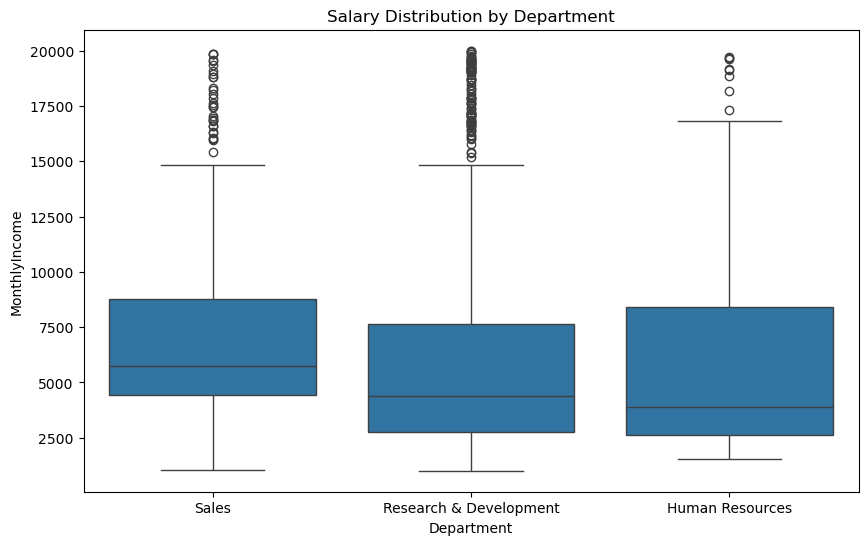

In [97]:
# salary by department 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='MonthlyIncome', data=HR)
plt.title('Salary Distribution by Department')
plt.show()

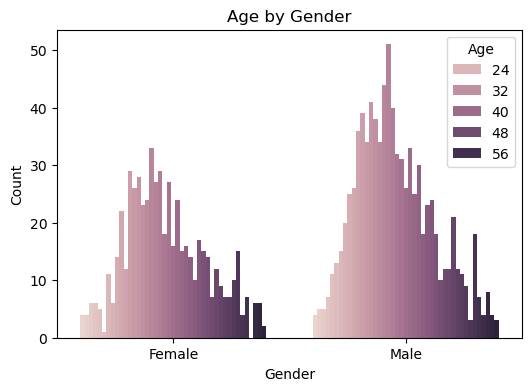

In [99]:
# Attrition by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Age', data=HR)
plt.title('Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

''' we can see her egae group of 30 to 45 is male dominated '''

''' i think so we can do so many visuals but for now lets move for next  '''

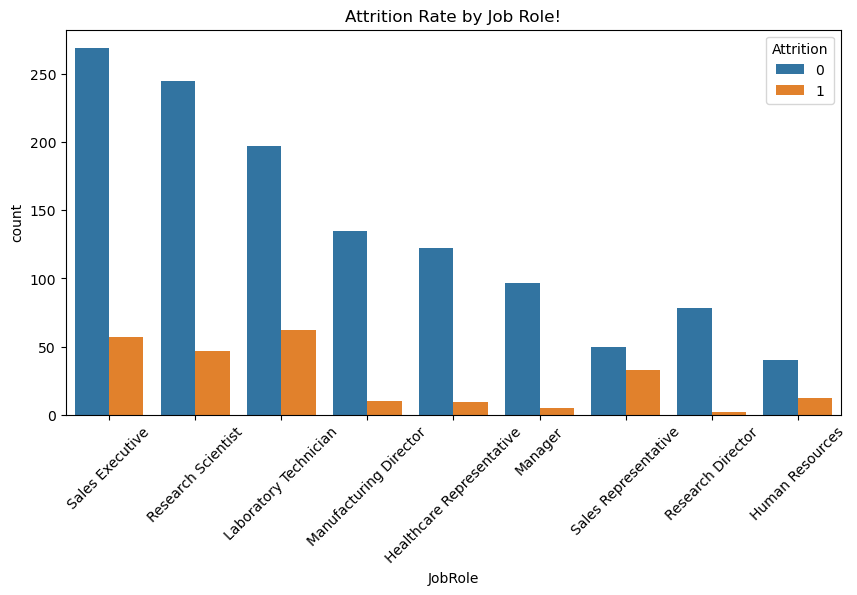

In [101]:
plt.figure(figsize=(10, 5))
sns.countplot(x='JobRole', hue='Attrition', data=HR)
plt.xticks(rotation=45)
plt.title("Attrition Rate by Job Role!")
plt.show()

''' Attrition Rate by Job Role '''

'''Attrition = 0 → Employee is still working (No Attrition)


Attrition = 1 → Employee has left the company (Attrition) '''

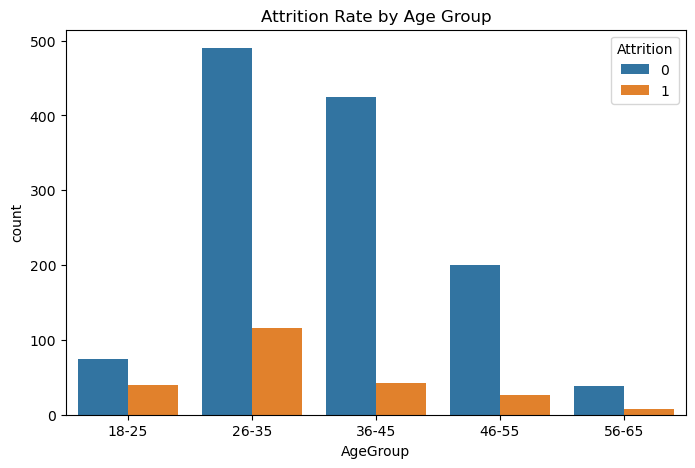

In [103]:
HR['AgeGroup'] = pd.cut(HR['Age'], bins=[18, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', hue='Attrition', data=HR)
plt.title("Attrition Rate by Age Group")
plt.show()

Attrition Rate by Age Group !!!

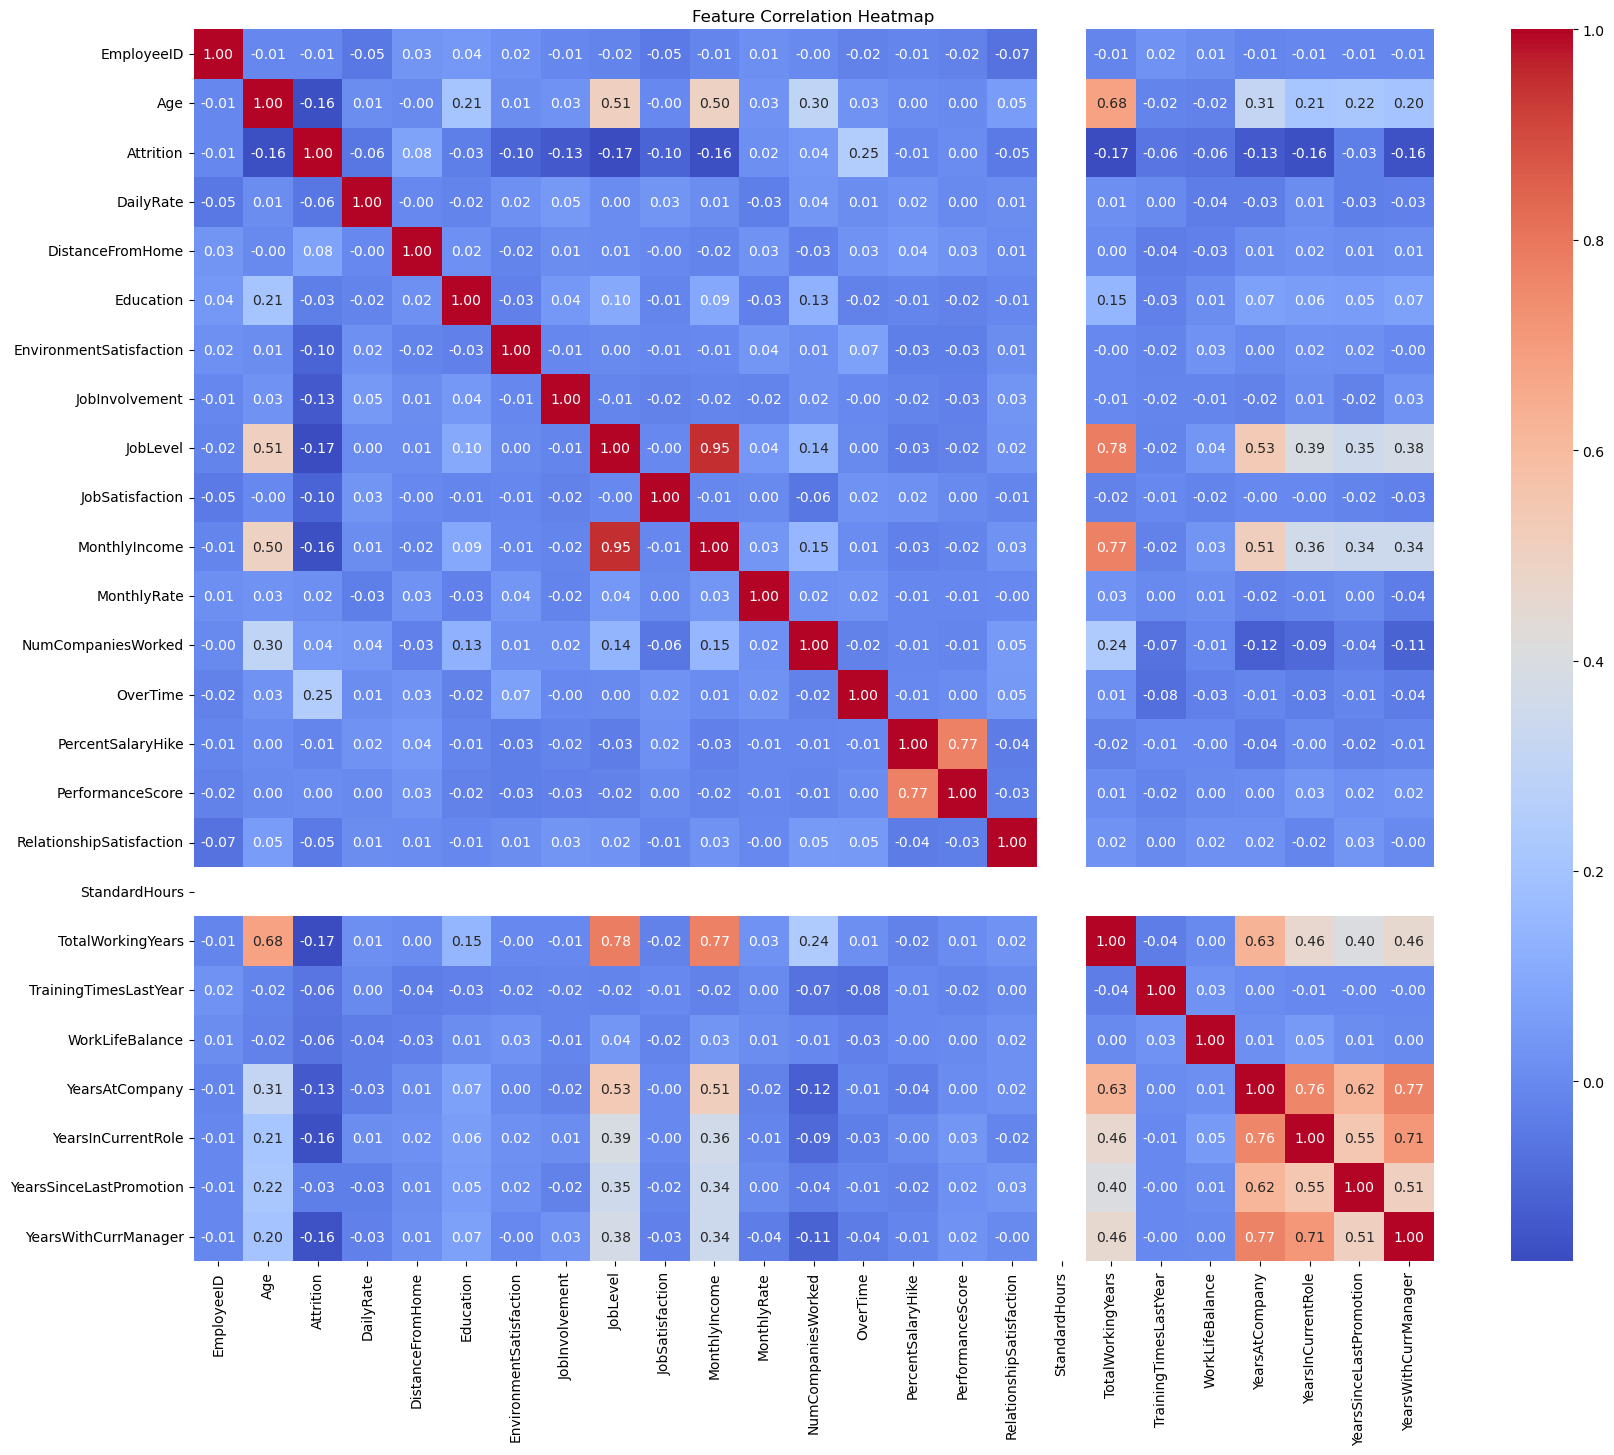

<Figure size 640x480 with 0 Axes>

In [107]:
numeric_cols = HR.select_dtypes(include=['number'])

# Plot the heatmap for correlations
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
# Save the figure as an image
plt.savefig('correlation_heatmap.png', dpi=300)

''' Correlation Heatmap '''

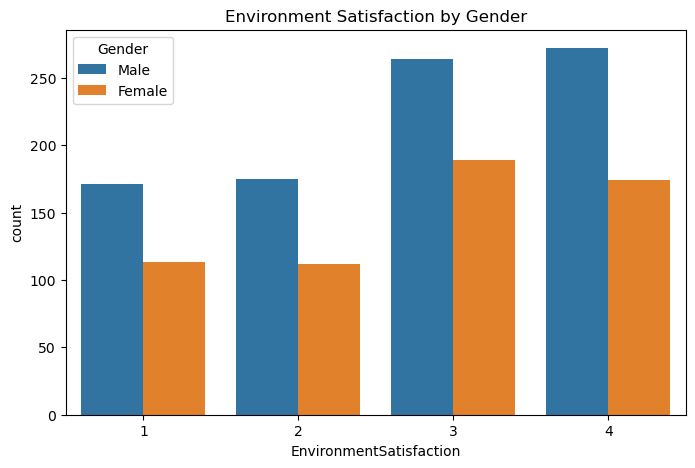

In [111]:
plt.figure(figsize=(8, 5))
sns.countplot(x='EnvironmentSatisfaction', hue='Gender', data=HR)
plt.title("Environment Satisfaction by Gender")
plt.show()
# lets say not much of significant difference or outcasted 

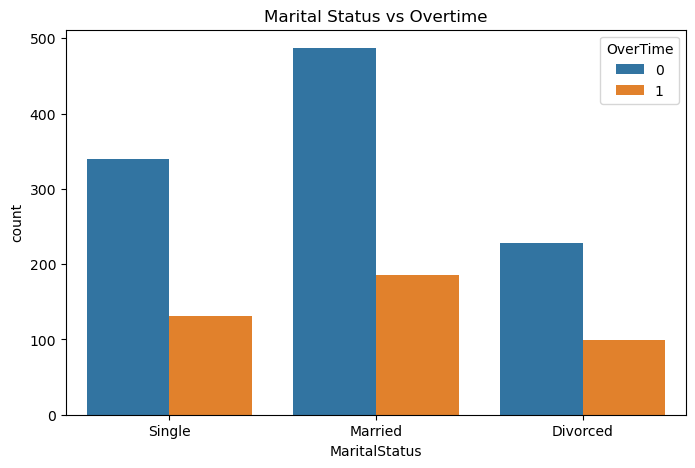

In [113]:
plt.figure(figsize=(8, 5))
sns.countplot(x='MaritalStatus', hue='OverTime', data=HR)
plt.title("Marital Status vs Overtime")
plt.show()

''' employee works overtime Yes (1) or No (0) '''

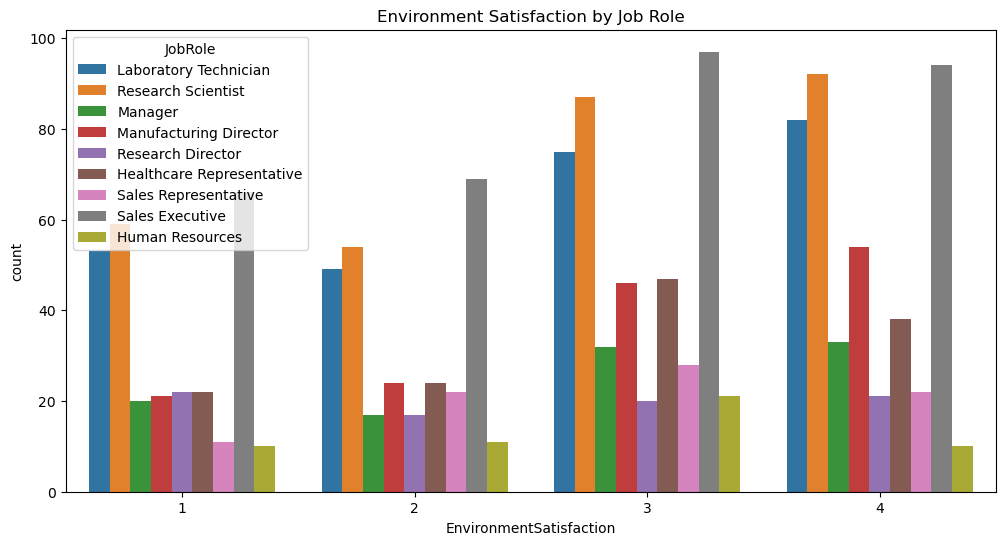

<Figure size 640x480 with 0 Axes>

In [118]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='JobRole', data=HR)
plt.title("Environment Satisfaction by Job Role")
plt.show()
# Save the figure as an image
plt.savefig('Environment Satisfaction by Job Role.png', dpi=300)  # saving this for presentation!

# Show the plot
plt.show()

# (1 = Low, 4 = Very High) sales team been enjoying this environment we can say and research scientist's also 
# but what about HR - i fell in this department there is mixed feelings

''' done with visulization's !!! '''

### Task 2: Statistical Analysis

#### 1. Hypothesis Testing

In [120]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

In [122]:
HR

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_outlier?,AgeGroup
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,80,8,0,1,6,4,0,5,False,36-45
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,80,10,3,3,10,7,1,7,False,46-55
2,4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,80,7,3,3,0,0,0,0,False,36-45
3,5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,80,8,3,3,8,7,3,0,False,26-35
4,7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,6,3,3,2,2,2,2,False,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,80,17,3,3,5,2,0,3,False,36-45
1466,2062,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,80,9,5,3,7,7,1,7,False,36-45
1467,2064,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,80,6,0,3,6,2,0,3,False,26-35
1468,2065,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,...,80,17,3,2,9,6,0,8,False,46-55


*** Split the data into two groups *** 

In [124]:
promoted = HR[HR['YearsSinceLastPromotion'] <= 3]
non_promoted = HR[HR['YearsSinceLastPromotion'] > 3]

*** Perform the t-test ***

In [128]:
# performed the t-test to compare the job satisfaction scores between the two groups.
t_stat, p_value = ttest_ind(promoted['JobSatisfaction'], non_promoted['JobSatisfaction'])

*** if the p-value is less than 0.05, we reject the null hypothesis (which suggests there is a significant difference in job satisfaction between the two groups).***

In [130]:
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in job satisfaction between promoted and non-promoted employees.")
else:
    print("Fail to reject the null hypothesis: No significant difference in job satisfaction between promoted and non-promoted employees.")


T-statistic: 0.6221960064248909
P-value: 0.5339096151000455
Fail to reject the null hypothesis: No significant difference in job satisfaction between promoted and non-promoted employees.


*** Mann-Whitney U test ***

* lets dig deep ! trying to find something important ! 

In [132]:
u_stat, p_value_u = mannwhitneyu(promoted['JobSatisfaction'], non_promoted['JobSatisfaction'], alternative='two-sided')

In [134]:
print(f'U-statistic: {u_stat}')
print(f'P-value: {p_value_u}')

# Conclusion based on p-value
if p_value_u < 0.05:
    print("Reject the null hypothesis: Significant difference in job satisfaction between promoted and non-promoted employees.")
else:
    print("Fail to reject the null hypothesis: No significant difference in job satisfaction between promoted and non-promoted employees.")


U-statistic: 188241.0
P-value: 0.5547145304703801
Fail to reject the null hypothesis: No significant difference in job satisfaction between promoted and non-promoted employees.


* From these results, we conclude that promotions in the last 3 years do not significantly affect job satisfaction, at least in the context of this hr data.

In [136]:
HR[['PerformanceScore', 'Department']].isnull().sum() # checking is there any null values 

PerformanceScore    0
Department          0
dtype: int64

In [138]:
# Group performance scores by department
dept_performance = [HR[HR['Department'] == dept]['PerformanceScore'] for dept in HR['Department'].unique()]

In [140]:
# Perform ANOVA test
f_stat, p_value_anova = f_oneway(*dept_performance) #One-Way ANOVA

In [142]:
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value_anova}')

# Conclusion based on p-value
if p_value_anova < 0.05:
    print("Reject the null hypothesis: Significant difference in performance scores across departments.")
else:
    print("Fail to reject the null hypothesis: No significant difference in performance scores across departments.")

F-statistic: 0.7940044059801676
P-value: 0.4522252122566278
Fail to reject the null hypothesis: No significant difference in performance scores across departments.


The p-value is much greater than the significance level of 0.05, so we fail to reject the null hypothesis. This indicates that there is no significant difference in the performance scores across the different departments in your dataset.

#### 2. Correlation Analysis

In [144]:
HR[['JobSatisfaction', 'PerformanceScore', 'YearsAtCompany', 'MonthlyIncome']].corr()

,JobSatisfaction,PerformanceScore,YearsAtCompany,MonthlyIncome
JobSatisfaction,1.000000,0.002297,-0.003803,-0.007157
PerformanceScore,0.002297,1.000000,0.003435,-0.017120
YearsAtCompany,-0.003803,0.003435,1.000000,0.514285
MonthlyIncome,-0.007157,-0.017120,0.514285,1.000000


*** Key Insights from the Correlation Analysis:
JobSatisfaction & PerformanceScore:

Correlation coefficient: 0.0023 (Very weak positive correlation)
Insight: There is almost no linear relationship between job satisfaction and performance score, suggesting that higher job satisfaction doesn't necessarily lead to better performance scores, at least in the current dataset.
JobSatisfaction & YearsAtCompany:

Correlation coefficient: -0.0038 (Very weak negative correlation)
Insight: Job satisfaction appears to have an almost negligible negative relationship with the number of years an employee has been with the company. This indicates that tenure has little to no effect on job satisfaction.
JobSatisfaction & MonthlyIncome:

Correlation coefficient: -0.0072 (Very weak negative correlation)
Insight: There is also a very weak negative relationship between job satisfaction and monthly income, suggesting that income does not have a significant impact on job satisfaction in this dataset.
PerformanceScore & YearsAtCompany:

Correlation coefficient: 0.0034 (Very weak positive correlation)
Insight: Similar to job satisfaction, performance score has almost no correlation with years at the company. This implies that tenure does not heavily influence an employee’s performance score.
PerformanceScore & MonthlyIncome:

Correlation coefficient: -0.0171 (Very weak negative correlation)
Insight: Performance score has a very weak negative correlation with monthly income, suggesting that income levels have minimal impact on performance scores in this data.
YearsAtCompany & MonthlyIncome:

Correlation coefficient: 0.5143 (Moderate positive correlation)
Insight: There is a moderate positive correlation between the number of years an employee has been at the company and their monthly income. This likely reflects the fact that employees tend to earn more as they gain experience and seniority in the company. ***

In [ ]:
### let move the model building part !!!

### Task 3: Modeling

* Using XGboost algorithem

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [3]:
## First we will read the data again
df = pd.read_csv("HR-Employee-Attrition Dataset.csv")
print(df.head(10))

   EmployeeID  Age  Attrition     BusinessTravel  DailyRate  \
0           1   41          1      Travel_Rarely       1102   
1           2   49          0  Travel_Frequently        279   
2           4   37          1      Travel_Rarely       1373   
3           5   33          0  Travel_Frequently       1392   
4           7   27          0      Travel_Rarely        591   
5           8   32          0  Travel_Frequently       1005   
6          10   59          0      Travel_Rarely       1324   
7          11   30          0      Travel_Rarely       1358   
8          12   38          0  Travel_Frequently        216   
9          13   36          0      Travel_Rarely       1299   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & 

In [5]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceScore', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Define categorical and numerical features
categorical_features = ["BusinessTravel", "Department", "Gender", "MaritalStatus", "JobRole", "EducationField"] 
numerical_features = ["Age", "MonthlyIncome", "DistanceFromHome", "YearsAtCompany", "TotalWorkingYears", "JobSatisfaction", "YearsInCurrentRole", "Attrition" ,"WorkLifeBalance"]

# Separate the dataframe into categorical and numerical columns
X_categorical = df[categorical_features]
X_numerical = df[numerical_features]

In [9]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [11]:
X_categorical = X_categorical.copy()  # Create a copy to avoid modifying the original DataFrame

for col in categorical_features:
    X_categorical[col] = label_encoder.fit_transform(X_categorical[col])

In [13]:
X_categorical = X_categorical.drop(columns=["JobRole"])

In [15]:
X_final = pd.concat([X_categorical, X_numerical], axis=1)

In [17]:
X_final.head(2)

,BusinessTravel,Department,Gender,MaritalStatus,EducationField,Age,MonthlyIncome,DistanceFromHome,YearsAtCompany,TotalWorkingYears,JobSatisfaction,YearsInCurrentRole,Attrition,WorkLifeBalance
0,2,2,0,2,1,41,5993,1,6,8,4,4,1,1
1,1,1,1,1,1,49,5130,8,10,10,2,7,0,3


In [19]:
y = df["Attrition"]  # Target variable
X_final = X_final.drop(columns=["Attrition"], errors="ignore")  # Drop if it exists

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [25]:
print("Before SMOTE:")
print(y_train.value_counts())  # Check class count before resampling
# this is the turning point while building the model inbalace between variables 

Before SMOTE:
Attrition
0    978
1    198
Name: count, dtype: int64


In [27]:
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())  # Check class count after resampling


After SMOTE:
Attrition
0    978
1    978
Name: count, dtype: int64


In [29]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(random_state=42)
# there is reason behind the using this model is xgboost handels better the unbalanced variable data "try'ed logistic but failed so badly"
# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [31]:
# Make predictions on the original test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7993197278911565
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       255
           1       0.28      0.33      0.31        39

    accuracy                           0.80       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.81      0.80      0.81       294



In [33]:
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled))

In [35]:
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred = xgb_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print precision, recall, f1-score
print(classification_report(y_test, y_pred))

Accuracy: 0.8129251700680272
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       255
           1       0.34      0.44      0.38        39

    accuracy                           0.81       294
   macro avg       0.62      0.65      0.64       294
weighted avg       0.83      0.81      0.82       294



In [41]:
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=2)  # Try 2 or 3
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       255
           1       0.34      0.44      0.38        39

    accuracy                           0.81       294
   macro avg       0.62      0.65      0.64       294
weighted avg       0.83      0.81      0.82       294



In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [1, 2, 3]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2}
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       255
           1       0.34      0.49      0.40        39

    accuracy                           0.81       294
   macro avg       0.63      0.67      0.64       294
weighted avg       0.84      0.81      0.82       294



This code performs hyperparameter tuning using GridSearchCV to improve the XGBoost model's performance. Since different hyperparameters affect model accuracy, the code tests multiple combinations of max_depth, learning_rate, n_estimators, and scale_pos_weight to find the best configuration. GridSearchCV runs cross-validation (cv=3) to ensure the model generalizes well, using F1-score as the evaluation metric. The best parameters are then used to train the final model, which is tested on unseen data (X_test), and its performance is evaluated using a classification report.

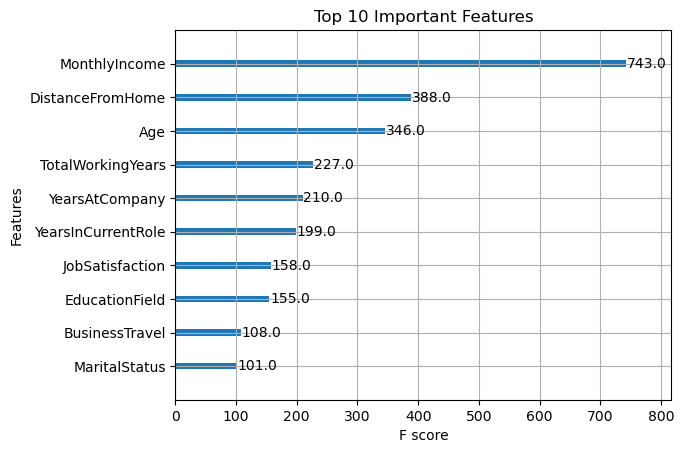

In [45]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Important Features')
plt.show()

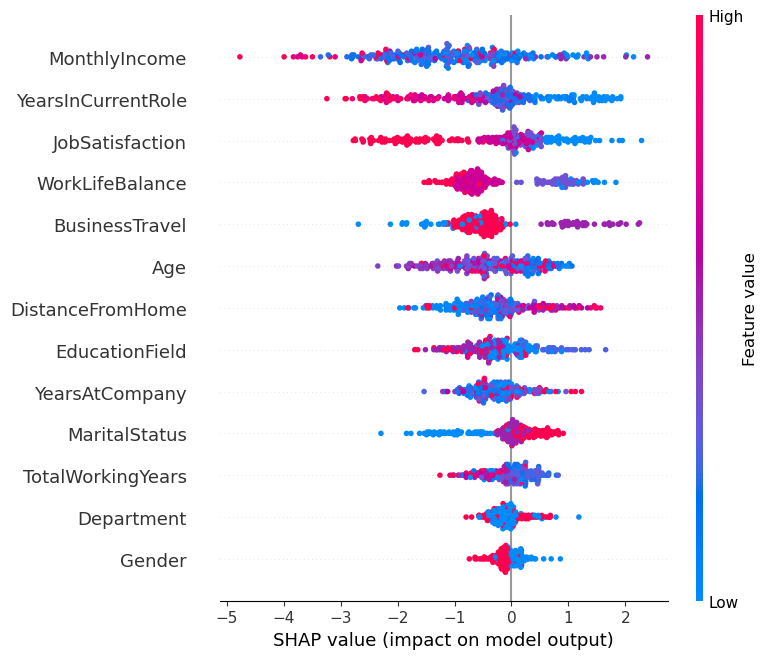

<Figure size 640x480 with 0 Axes>

In [53]:
import shap

# Explainer object
explainer = shap.TreeExplainer(xgb_model)

# SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

plt.savefig('influence attrition.png', dpi=300)  # saving this for presentation!
 # using this plot we trying to understand the influence of fearures on attrition 'monthly income does highly effect

Accuracy: 0.8129251700680272
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       255
           1       0.34      0.44      0.38        39

    accuracy                           0.81       294
   macro avg       0.62      0.65      0.64       294
weighted avg       0.83      0.81      0.82       294

Confusion Matrix:
[[222  33]
 [ 22  17]]
ROC-AUC: 0.7094017094017093


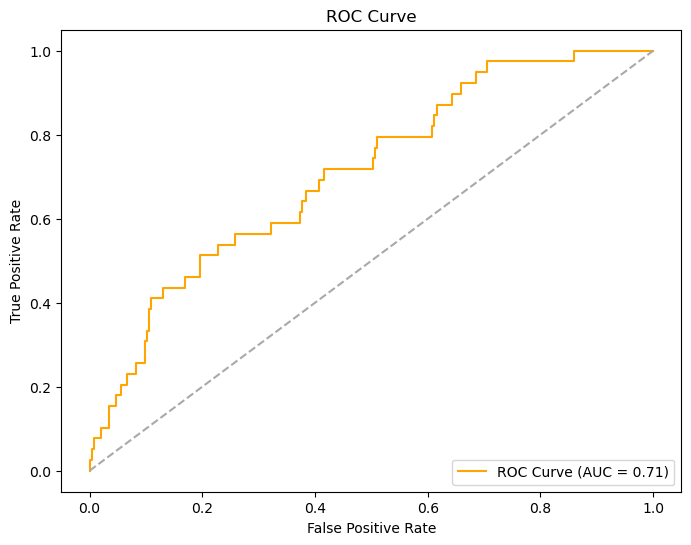

In [49]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Predicting the test set
y_pred = xgb_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


The ROC curve shows that the model has an AUC score of **0.71**, indicating that it performs better than random guessing but still has room for improvement. The curve is above the diagonal, meaning the model is learning patterns, but further fine-tuning is needed. To improve performance, we can adjust hyperparameters, enhance feature engineering, handle class imbalance, or experiment with different models. While this is the optimal output for now, future refinements will focus on fine-tuning and optimizing the model further. 🚀

Thank You !!!!!
 * Mahesh Rathod 